In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart_train.csv',index_col=0)
df1 = pd.read_csv('heart_test.csv',index_col=0)

In [4]:
print('df导入数据的大小',df.shape)
ed_data = df.dropna(axis=0)
print('df清除信息有空值的数据：',ed_data.shape)
ed_data.drop_duplicates(keep='last')
print('df清除重复数据：',ed_data.shape)
print('df1导入数据的大小',df1.shape)
ed_data1 = df1.dropna(axis=0)
print('df1清除信息有空值的数据：',ed_data1.shape)
ed_data1.drop_duplicates(keep='last')
print('df1清除重复数据：',ed_data1.shape)

df导入数据的大小 (20000, 2)
df清除信息有空值的数据： (20000, 2)
df清除重复数据： (20000, 2)
df1导入数据的大小 (8000, 2)
df1清除信息有空值的数据： (8000, 2)
df1清除重复数据： (8000, 2)


In [5]:
train_list=[]
for items in df.values:
    train_list.append([float(i) for i in items[0].split(',')] + [items[1]])

data = pd.DataFrame(np.array(train_list))
data.columns = ['s_'+str(i) for i in range(len(train_list[0])-1)]+['label']
# train = reduce_mem_usage(train)
data.head(5)

test_list=[]
for items in df1.values:
    test_list.append([float(i) for i in items[0].split(',')] + [items[1]])

data1 = pd.DataFrame(np.array(test_list))
data1.columns = ['s_'+str(i) for i in range(len(test_list[0])-1)]+['label']
# train = reduce_mem_usage(train)
data1.head(5)

,s_0,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,...,s_196,s_197,s_198,s_199,s_200,s_201,s_202,s_203,s_204,label
0,0.000000,0.081528,0.169488,0.265317,0.383357,0.405093,0.415054,0.437824,0.433064,0.416850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1.000000,0.657398,0.712122,0.715697,0.704944,0.686842,0.623540,0.496277,0.352106,0.079853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,0.978565,0.943660,0.903005,0.864413,0.810498,0.741020,0.650031,0.575838,0.495444,0.446333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,1.000000,0.861803,0.425404,0.423682,0.427125,0.428843,0.408085,0.430560,0.427125,0.435697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.875879,0.297943,0.035750,0.114283,0.165898,0.175087,0.250918,0.285270,0.233431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
data1.isnull().sum().sum()

0

In [7]:
data.isnull().sum().sum()

0

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
feature_cols = [x for x in data.columns if x not in 'label']
Xtrain = data[feature_cols]
# features.values
ytrain = data['label']
Xtest = data1[feature_cols]
ytest = data1['label']
feature = pd.concat([Xtrain,Xtest])
target = pd.concat([ytrain,ytest])
# Xtrain,Xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.3)

No handles with labels found to put in legend.


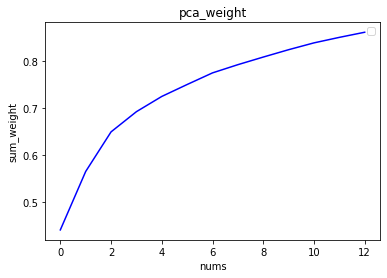

[0.43987194454802997, 0.5643820297344527, 0.6487622895077275, 0.6917972722354008, 0.7242678720962893, 0.7496973732335381, 0.7744514961330571, 0.7919528139805178, 0.8081586955495128, 0.823853920310568, 0.8383969680839797, 0.8501275376274395, 0.861050752073901]


In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
new_feature = pca.fit_transform(feature)
# pca = PCA(n_components=20)
# new_feature1 = pca.fit_transform(Xtest)
#
# inv_feature = pca.inverse_transform(feature)
Xtrain,Xtest,ytrain,ytest=train_test_split(new_feature,target,test_size=0.3)
def sum_all(x,confi=[]):
    for i in range(len(x)):
        confi.append(x[:i+1].sum())
    return confi
co = sum_all(pca.explained_variance_ratio_)
x = list(range(len(co)))
# 
plt.plot(x, co, 'b')
plt.title('pca_weight')
plt.xlabel('nums')
plt.ylabel('sum_weight')

plt.legend()
plt.show()
# plt.show()
print(co)
# print(sum(pca.explained_variance_ratio_))
# new_feature.shape

# from sklearn.preprocessing import StandardScaler
# def normalization(df):
#     numerator = df.sub(df.min())
#     denominator = (df.max()).sub(df.min())
#     Y = numerator.div(denominator)
#     return Y
# new_feature = pd.DataFrame(new_feature)

# # new_feature = StandardScaler().fit_transform(new_feature)
# new_feature = normalization(new_feature)

In [51]:
# feature_cols = [x for x in data.columns if x not in 'label']
# Xtrain = new_feature
# # features.values
# ytrain = data['label']
# Xtest = new_feature1
# ytest = data1['label']
# # Xtrain,Xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.3)

In [52]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_leaf=18,
                                  random_state=15)
dt = dt.fit(Xtrain, ytrain)

In [53]:
#定义一个函数measure_error，用于将四个数值组合到一起
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred,average = 'macro'),
                      'recall': recall_score(y_true, y_pred,average = 'macro'),
                      'f1': f1_score(y_true, y_pred,average = 'macro')},
                      name=label)

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ytrain_pred = dt.predict(Xtrain)
ytest_pred = dt.predict(Xtest)

train_test_full_error = pd.concat([measure_error(ytrain, ytrain_pred, 'train'),
                              measure_error(ytest, ytest_pred, 'test')],
                              axis=1)
train_test_full_error

,train,test
accuracy,0.874643,0.871429
f1,0.663377,0.647238
precision,0.833833,0.762676
recall,0.638117,0.626647


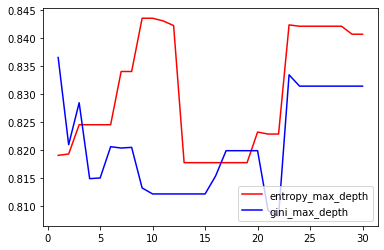

8
0


In [55]:
import matplotlib.pyplot as plt
test1=[]
test2=[]
for i in range(30):
    clf=tree.DecisionTreeClassifier(max_depth=6,
                             min_samples_leaf=i+1,       
                             criterion='entropy',
                             random_state=30,
                             splitter='random')
    clf=clf.fit(Xtrain,ytrain)
    score=clf.score(Xtest,ytest)
    test1.append(score)

for i in range(30):
    clf=tree.DecisionTreeClassifier(max_depth=6,
                            min_samples_leaf=i+1,
                             criterion='gini',
                             random_state=30,
                             splitter='random')
    clf=clf.fit(Xtrain,ytrain)
    score=clf.score(Xtest,ytest)
    test2.append(score)
plt.plot(range(1,31),test1,color='red',label='entropy_max_depth')
plt.plot(range(1,31),test2,color='blue',label='gini_max_depth')
plt.legend()
plt.show()
print(test1.index(max(test1)))
print(test2.index(max(test2)))

In [56]:
from sklearn.svm import SVC
from time import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# Xtrain,Xtest,ytrain,ytest=train_test_split(new_feature,target,test_size=0.3)
k = np.array(['linear','poly','rbf','sigmoid'],dtype=str)
for i in range(len(k)):
    # time0=time() #记录当前时间
    time0 = datetime.datetime.now()
    heart=k[i]
    clf= SVC(kernel = heart)
    #使用训练集数据对模型进行训练
    clf = clf.fit(Xtrain, ytrain)
    #使用训练好的模型对测试集进行测试，并输出正确率和所用时间
    score=clf.score(Xtest,ytest)
    print("使用 %s 内核的正确率是：%f" % (heart,score))
    time1 = datetime.datetime.now()
    print('所用时间是：',time1-time0)

使用 linear 内核的正确率是：0.809524
所用时间是： 0:00:10.840042
使用 poly 内核的正确率是：0.906786
所用时间是： 0:00:07.600659
使用 rbf 内核的正确率是：0.937143
所用时间是： 0:00:07.274544
使用 sigmoid 内核的正确率是：0.648690
所用时间是： 0:00:11.365548


In [58]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [59]:
# Xtrain,Xtest,ytrain,ytest=train_test_split(new_feature,target,test_size=0.3)
GNB = GaussianNB()
cv_N = []
for i in range(2,30):
    scores = cross_val_score(GNB,Xtrain,ytrain,cv=i)
#     print(scores)                         #输出每次的打分值
    cv_N.append(np.mean(scores))#求打分的平均值

最高得分为： 0.8148979591836735
cv的最好参数为： 2


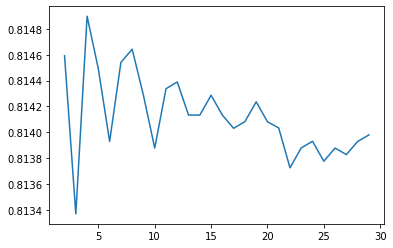

In [60]:
x = np.linspace(2,29,28)
plt.plot(x,cv_N)
print('最高得分为：',max(cv_N))
print('cv的最好参数为：',cv_N.index(max(cv_N)))

In [61]:
scoring = ['accuracy','recall_macro']
for n in scoring:
    GNB = GaussianNB()
    scores = cross_val_score(GNB,Xtrain,ytrain,cv=17,scoring=n)
    # print(scores)                         #输出每次的打分值
    print('scoring=',n)
    print('平均得分',np.mean(scores))

scoring= accuracy
平均得分 0.8140304012975529
scoring= recall_macro
平均得分 0.5834168987578218


In [62]:
# # Xtrain,Xtest,ytrain,ytest=train_test_split(new_feature,target,test_size=0.3)
# # y = y.replace('Iris-versicolor',0).replace('Iris-setosa',1).replace('Iris-virginica',2).astype(np.int)
# nb = {'高斯gaussian': GaussianNB(),
#       '伯努利bernoulli': BernoulliNB(),
#       '多项multinomial': MultinomialNB()
#      }
# scores = {}
# for key, model in nb.items():
# #交叉验证并评分，可参考步骤5的相关参数，设置参数scoring='accuracy' s = cross_val_score()
#     s = cross_val_score(model,Xtrain,ytrain,cv=17,scoring='accuracy')
#     scores[key] = np.mean(s)           #计算每个模型交叉验证后的平均分
# scores

深度

In [63]:
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential   #导入序贯模型
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization  #Dense为全连接层

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Convolution2D, Convolution1D

In [65]:
if Xtrain.ndim != 3:
    Xtrain = np.expand_dims(Xtrain,axis=1)
if Xtest.ndim != 3:
    Xtest = np.expand_dims(Xtest,axis=1)
Xtrain.shape

(19600, 1, 13)

In [66]:
time0 = datetime.datetime.now()
# sco = []
# for i in range(30):
model_2 = Sequential()
model_2.add(BatchNormalization())
model_2.add(Convolution1D(filters=512,
    kernel_size=1,
    strides=1,
    padding='same',
    activation='relu'
    ))
model_2.add(LSTM(256, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.3))
model_2.add(Dense(128, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(64, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(32, activation='relu'))
# model_2.add(BatchNormalization())
# model_2.add(Dropout(0.3))
# model_2.add(Dense(32, activation='relu'))
model_2.add(BatchNormalization())
# model_2.add(Dropout(0.1))
model_2.add(Dense(4, activation='softmax'))
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_2.fit(Xtrain,ytrain,batch_size=512,epochs=50,validation_data=(Xtest, ytest),verbose=1)
#     sco.append(model_2.evaluate(Xtest, ytest)[1])
time1 = datetime.datetime.now()
print('所用时间是：',time1-time0)

Epoch 1/50
39/39 [==============================] - 3s 36ms/step - loss: 0.8365 - accuracy: 0.7088 - val_loss: 1.0593 - val_accuracy: 0.6533
Epoch 2/50
39/39 [==============================] - 1s 29ms/step - loss: 0.2847 - accuracy: 0.9260 - val_loss: 0.9281 - val_accuracy: 0.6533
Epoch 3/50
39/39 [==============================] - 1s 28ms/step - loss: 0.2136 - accuracy: 0.9404 - val_loss: 0.9375 - val_accuracy: 0.6533
Epoch 4/50
39/39 [==============================] - 1s 35ms/step - loss: 0.1841 - accuracy: 0.9465 - val_loss: 0.8647 - val_accuracy: 0.6533
Epoch 5/50
39/39 [==============================] - 1s 37ms/step - loss: 0.1576 - accuracy: 0.9548 - val_loss: 0.7521 - val_accuracy: 0.6905
Epoch 6/50
39/39 [==============================] - 1s 37ms/step - loss: 0.1435 - accuracy: 0.9575 - val_loss: 0.6617 - val_accuracy: 0.7489
Epoch 7/50
39/39 [==============================] - 2s 42ms/step - loss: 0.1462 - accuracy: 0.9563 - val_loss: 0.4840 - val_accuracy: 0.8312
Epoch 8/50
39

In [67]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

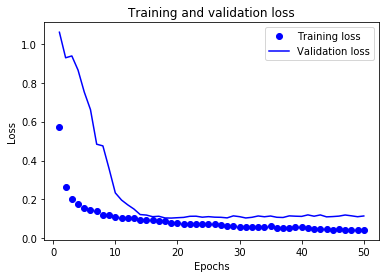

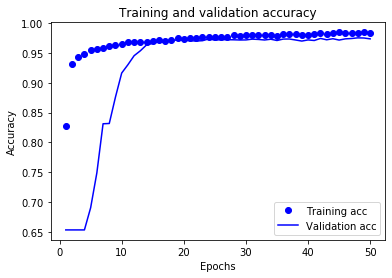

In [68]:
import matplotlib.pyplot as plt
 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
 
epochs = range(1, len(acc) + 1)
 
# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()
#打印图一
 
plt.clf()   # 清除数字
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
plt.show()
#打印图二

In [69]:
if Xtest.ndim != 3:
    Xtest = np.expand_dims(Xtest,axis=1)
    print(Xtest.shape)
# xtest.shape
model_2.evaluate(Xtest, ytest)

263/263 [==============================] - 1s 3ms/step - loss: 0.1153 - accuracy: 0.9735


[0.11534585803747177, 0.9734523892402649]

In [61]:
# model_2.summary()

ababoost

In [193]:
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
# clf = AdaBoostClassifier(n_estimators=30, learning_rate=0.1)
# clf.fit(Xtrain, ytrain)

In [ ]:
feature_cols = [x for x in data.columns if x not in 'label']
Xtrain = data[feature_cols]
# features.values
ytrain = data['label']
Xtest = data1[feature_cols]
ytest = data1['label']

In [196]:
# time0=time() #记录当前时间
time0 = datetime.datetime.now()
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15, min_samples_split=30, min_samples_leaf=10),
                         algorithm="SAMME",
                         n_estimators=100, learning_rate=0.9)
bdt.fit(Xtrain, ytrain)
time1 = datetime.datetime.now()
print('所用时间是：',time1-time0)

所用时间是： 0:07:19.977948


In [197]:
bdt.score(Xtest, ytest)

0.976375

In [198]:
# time0=time() #记录当前时间
time0 = datetime.datetime.now()
bdt1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15, min_samples_split=30, min_samples_leaf=10),
                         algorithm="SAMME.R",
                         n_estimators=100, learning_rate=0.9)
bdt1.fit(Xtrain, ytrain)
bdt1.score(Xtest, ytest)
time1 = datetime.datetime.now()
print('所用时间是：',time1-time0)

所用时间是： 0:07:53.663910


In [1]:
bdt1.score(Xtest, ytest)

NameError: name 'bdt1' is not defined

In [199]:
# from sklearn.externals.six.moves import zip

import matplotlib.pyplot as plt
import matplotlib as mpl
from six import StringIO
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score#计算roc和auc
from sklearn.tree import DecisionTreeClassifier

In [200]:
#获得预测的准确率，accuracy_score，是单个分类器的准确率。
#预测的误差率estimator_errors_
real_test_errors = []#第一个模型每一个分类器的误差率
discrete_test_errors = []#第二个模型每一个分类器的误差率

for bdt_test_predict, bdt1_test_predict in zip(
        bdt.staged_predict(Xtest), bdt1.staged_predict(Xtest)):
    real_test_errors.append(
        1. - accuracy_score(bdt_test_predict, ytest))
    discrete_test_errors.append(
        1. - accuracy_score(bdt1_test_predict, ytest))

n_trees_discrete = len(bdt1)
n_trees_real = len(bdt)

discrete_estimator_errors = bdt1.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt1.estimator_weights_[:n_trees_discrete]#获得权重

D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24369 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30446 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anconda\lib\site-packages\matpl

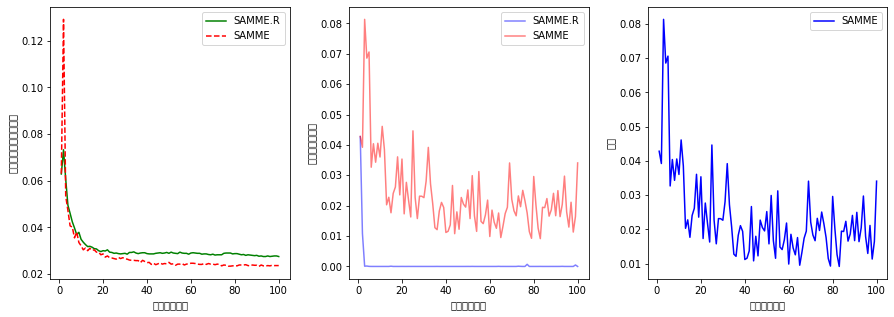

In [201]:
plt.figure(figsize=(15, 5), facecolor='w')

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='g', label='SAMME.R')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='r',
         linestyle='dashed', label='SAMME')
plt.legend()
# plt.ylim(0.18, 0.62)
plt.ylabel(u'测试数据的预测错误率')
plt.xlabel(u'弱分类器数目')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME.R', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME', alpha=.5)
plt.legend()
plt.ylabel(u'模型实际错误率')
plt.xlabel(u'弱分类器数目')
# plt.ylim((.2,
#          max(real_estimator_errors.max(),
#              discrete_estimator_errors.max()) * 1.2))
# plt.xlim((-20, len(bdt1) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), real_estimator_errors,
         "b", label='SAMME')
plt.legend()
plt.ylabel(u'权重')
plt.xlabel(u'弱分类器编号')
# plt.ylim((0, discrete_estimator_weights.max() * 1.2))
# plt.xlim((-20, n_trees_discrete + 20))

# 显示
plt.subplots_adjust(wspace=0.25)
plt.show()

xgboost

In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [43]:
def notEmpty(s):
    return s != ''

In [44]:
feature_cols = [x for x in data.columns if x not in 'label']
Xtrain = new_feature
# features.values
ytrain = data['label']
Xtest = new_feature1
ytest = data1['label']
# Xtrain,Xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.3)

In [45]:
# XGBoost将数据转换为XGBoost可用的数据类型
dtrain = xgb.DMatrix(Xtrain, label=ytrain)
dtest = xgb.DMatrix(Xtest)

In [46]:
# XGBoost模型构建
# 1. 参数构建
params = {'max_depth':25, 'eta':0.1, 'eval_metric':'mlogloss','objective':'multi:softmax','num_class':4,'min_child_weight':10}
num_round = 200
# 2. 模型训练
bst = xgb.train(params, dtrain, num_round)
# 3. 模型保存
bst.save_model('xgb.model')

In [48]:
# XGBoost模型预测
y_pred = bst.predict(dtest)
print(mean_squared_error(ytest, y_pred))
print(accuracy_score(ytest,y_pred))

ValueError: training data did not have the following fields: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

随机森林

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [50]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [51]:
feature_cols = [x for x in data.columns if x not in 'label']
Xtrain = new_feature
# features.values
ytrain = data['label']
Xtest = new_feature1
ytest = data1['label']
# Xtrain,Xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.3)

In [52]:
#随机森林模型
### n_estimators：迭代次数，每次迭代为Y产生一个模型
forest = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=15, random_state=20)
forest.fit(Xtrain, ytrain)#max_depth一般不宜设置过大，把每个模型作为一个弱分类器

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=20)

In [53]:
forest.score(Xtest,ytest)

0.58725

In [54]:
#定义一个函数measure_error，用于将四个数值组合到一起
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred).round(3),
                      'precision': precision_score(y_true, y_pred,average = None).round(3),
                      'recall': recall_score(y_true, y_pred,average = None).round(3),
                      'f1': f1_score(y_true, y_pred,average = None).round(3)},
                      name=label)

In [214]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ytrain_pred = forest.predict(Xtrain)
ytest_pred = forest.predict(Xtest)

train_test_full_error = pd.concat([measure_error(ytrain, ytrain_pred, 'train'),
                              measure_error(ytest, ytest_pred, 'test')],
                              axis=1)
train_test_full_error

,train,test
accuracy,0.983,0.963
f1,"[0.987, 0.858, 0.982, 0.992]","[0.973, 0.751, 0.937, 0.976]"
precision,"[0.975, 1.0, 1.0, 1.0]","[0.95, 0.97, 0.985, 0.996]"
recall,"[1.0, 0.751, 0.964, 0.985]","[0.997, 0.613, 0.894, 0.957]"


In [215]:
from tensorflow.python.keras.utils import np_utils
# Xtrain,Xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.3)
#使用keras的函数to_categorical对标签集做独热编码
ytrain=np_utils.to_categorical(ytrain,num_classes=4)
ytest=np_utils.to_categorical(ytest,num_classes=4)
#查看训练集第1条数据的标签独热编码后的值
ytest = pd.DataFrame(ytest)
ytrain = pd.DataFrame(ytrain)
# print("训练集第1条数据的标签独热编码后的值",ytrain) 

In [216]:
#随机森林模型
### n_estimators：迭代次数，每次迭代为Y产生一个模型
forest = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=15, random_state=20)
forest.fit(Xtrain, ytrain)#max_depth一般不宜设置过大，把每个模型作为一个弱分类器

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=20)

In [217]:
# 模型效果评估
score = forest.score(Xtest, ytest)
print ("准确率:%.2f%%" % (score * 100))
#模型预测
forest_y_score = forest.predict_proba(Xtest)# prodict_proba输出概
# print(forest_y_score)

准确率:95.84%


In [218]:
#模型效果评估
score = forest.score(Xtest, ytest)
print ("准确率:%.2f%%" % (score * 100))
#模型预测
forest_y_score = forest.predict_proba(Xtest)# prodict_proba输出概率
print(forest_y_score[0])
#计算ROC值
forest_fpr1, forest_tpr1, _ = metrics.roc_curve(label_binarize(ytest[0],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[0].ravel())
forest_fpr2, forest_tpr2, _ = metrics.roc_curve(label_binarize(ytest[1],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[1].ravel())
forest_fpr3, forest_tpr3, _ = metrics.roc_curve(label_binarize(ytest[2],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[2].ravel())
forest_fpr4, forest_tpr4, _ = metrics.roc_curve(label_binarize(ytest[3],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[3].ravel())
#AUC值
auc1 = metrics.auc(forest_fpr1, forest_tpr1)
auc2 = metrics.auc(forest_fpr2, forest_tpr2)
auc3 = metrics.auc(forest_fpr3, forest_tpr3)
auc4 = metrics.auc(forest_fpr4, forest_tpr4)

print ("label—0目标属性AUC值：", auc1)
print ("label—1目标属性AUC值：", auc2)
print ("label—2目标属性AUC值：", auc3)
print ("label—3目标属性AUC值：", auc4)

准确率:95.84%
[[0.9111203  0.0888797 ]
 [0.97930756 0.02069244]
 [0.95226253 0.04773747]
 ...
 [0.02371444 0.97628556]
 [0.07060897 0.92939103]
 [0.17631897 0.82368103]]
label—0目标属性AUC值： 0.993787671875
label—1目标属性AUC值： 0.997994203125
label—2目标属性AUC值： 0.998471015625
label—3目标属性AUC值： 0.9995650468750001


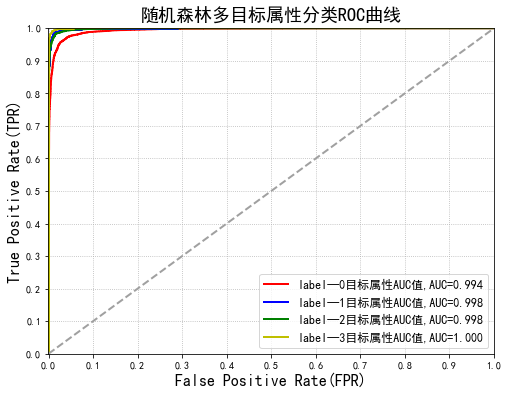

In [219]:
## 8. 画图（ROC图）
plt.figure(figsize=(8, 6), facecolor='w')
plt.plot(forest_fpr1,forest_tpr1,c='r',lw=2,label=u'label—0目标属性AUC值,AUC=%.3f' % auc1)
plt.plot(forest_fpr2,forest_tpr2,c='b',lw=2,label=u'label—1目标属性AUC值,AUC=%.3f' % auc2)
plt.plot(forest_fpr3,forest_tpr3,c='g',lw=2,label=u'label—2目标属性AUC值,AUC=%.3f' % auc3)
plt.plot(forest_fpr4,forest_tpr4,c='y',lw=2,label=u'label—3目标属性AUC值,AUC=%.3f' % auc4)
plt.plot((0,1),(0,1),c='#a0a0a0',lw=2,ls='--')
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)', fontsize=16)
plt.ylabel('True Positive Rate(TPR)', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'随机森林多目标属性分类ROC曲线', fontsize=18)
plt.show()